In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [3]:
X = []

nifti_folder_path = '/content/drive/MyDrive/IBMB/nifti_128x128/'

for nifti_file in os.listdir(nifti_folder_path):
  nifti_file_path = nifti_folder_path + nifti_file
  data = nib.load(nifti_file_path)
  nifti_array=np.array(data.dataobj)
  X.append(nifti_array)

# print(X)

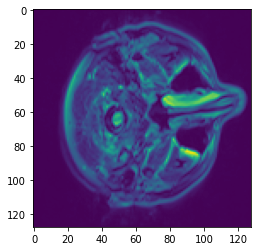

In [4]:
# print(X[0])
plt.imshow(X[0][:,:,0])  #to show the 1st slice

In [5]:
Y_file = pd.read_csv('/content/drive/MyDrive/IBMB/IBMB_Dataset_Y.csv')

Y_arr = np.asarray(Y_file)
Y = Y_arr[:260,1]

In [6]:
###########################################################################################
Y_float = np.asarray(Y).astype('float32')
print(Y_arr.shape)
print(Y.shape)
print(Y_float.shape)
print(Y_float)

(421, 5)
(260,)
(260,)
[1. 0. 1. 0. 2. 1. 1. 1. 0. 0. 0. 0. 3. 1. 1. 1. 0. 1. 0. 3. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 3. 0. 0. 0. 0. 0. 0. 3. 1. 0. 1. 2. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 2. 1. 3. 1. 1. 1. 1. 1. 1. 0. 0. 0. 3. 1. 0. 0. 0. 1.
 1. 2. 0. 0. 1. 0. 2. 0. 1. 1. 0. 1. 0. 0. 2. 1. 2. 0. 1. 1. 0. 0. 0. 2.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 3. 0. 0. 1. 0. 0. 2. 2. 0. 1. 0. 0. 0.
 0. 1. 2. 2. 3. 3. 1. 1. 2. 1. 1. 3. 2. 3. 2. 2. 1. 1. 1. 1. 1. 2. 3. 1.
 3. 1. 1. 2. 3. 3. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2.]


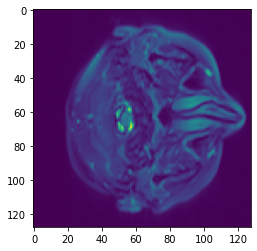

In [7]:
from keras.utils import to_categorical

X_arr = np.asarray(X)

X_reshaped = X_arr.reshape(260, 128, 128, 18, 1)
Y_cat = to_categorical(Y_float).astype(np.float32)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_reshaped, Y_cat, test_size=0.10)

# print(x_train[0])
plt.imshow(x_train[233][:,:,0,0])  #to show the 1st slice

In [8]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization

In [9]:
sample_shape = (128, 128, 18, 1)

# Create the model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', data_format='channels_last', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 126, 126, 16, 32)  896       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 63, 8, 32)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 8, 32)     128       
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 8, 32)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 61, 61, 6, 64)     55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 30, 30, 3, 64)     0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 3, 64)     2

In [10]:
# Fit data to model
history = model.fit(x_train,y_train, batch_size=40, epochs= 100, verbose=1, validation_split=0.3)

Epoch 1/100
5/5 [==============================] - 11s 613ms/step - loss: 59.5776 - accuracy: 0.3691 - val_loss: 103.0600 - val_accuracy: 0.3803
Epoch 2/100
5/5 [==============================] - 2s 363ms/step - loss: 63.6637 - accuracy: 0.3494 - val_loss: 146.4353 - val_accuracy: 0.4930
Epoch 3/100
5/5 [==============================] - 2s 363ms/step - loss: 29.5887 - accuracy: 0.4847 - val_loss: 151.5364 - val_accuracy: 0.0845
Epoch 4/100
5/5 [==============================] - 2s 359ms/step - loss: 11.0800 - accuracy: 0.4360 - val_loss: 59.8246 - val_accuracy: 0.3239
Epoch 5/100
5/5 [==============================] - 2s 362ms/step - loss: 8.1916 - accuracy: 0.5075 - val_loss: 61.0062 - val_accuracy: 0.3380
Epoch 6/100
5/5 [==============================] - 2s 363ms/step - loss: 7.1041 - accuracy: 0.4579 - val_loss: 64.7626 - val_accuracy: 0.3099
Epoch 7/100
5/5 [==============================] - 2s 363ms/step - loss: 5.8751 - accuracy: 0.4573 - val_loss: 47.3752 - val_accuracy: 0.338

In [17]:
y_pred=model.predict(x_test)